In [1]:
import pandas as pd
from sqlalchemy.engine import create_engine
import sqlite3
import pymongo
import sqlalchemy

import numpy as np
from IPython.core.display import display, HTML
import pymongo
from pymongo import MongoClient
print ('Mongo version', pymongo.__version__)
client = MongoClient('localhost', 27017)  #MongoClient('mongodb://localhost:27017/')
db = client.test
collection = db.people

Mongo version 3.7.1


In [630]:
import math

#collection.drop()
#os.system('mongoimport -d test -c people dummyData.json')

cursor = collection.find().sort('Age',pymongo.ASCENDING).limit(3)
for doc in cursor:
    print (doc)

db = client['datacampdb']
article = {"author": "Derrick Mwiti",
            "about": "Introduction to MongoDB and Python",
            "tags":
                ["mongodb", "python", "pymongo"]}

articles = db.articles
result = articles.insert_one(article)

In [726]:
pd.read_csv("googleplaystore_user_reviews.csv").head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


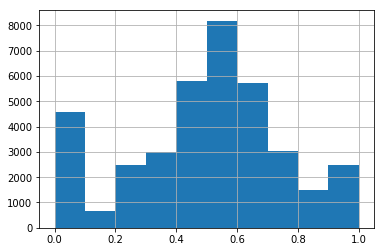

In [733]:
import matplotlib.pyplot as plt
sentiment_accuracy= pd.read_csv("googleplaystore_user_reviews.csv")['Sentiment_Subjectivity'].dropna()
sentiment_accuracy.hist()

In [745]:
#sentiment_accuracy[sentiment_accuracy>0].apply(lambda x: round(x,2)).to_excel('Sentiment Accuracy.xlsx')
sentiment_accuracy[sentiment_accuracy>0].apply(lambda x: round(x,2)).apply(lambda x: '('+str(x)+ '),').to_excel('Sentiment Accuracy2.xlsx')

### SQL

In [2]:
%load_ext sql

In [592]:
apps_pandas= pd.read_csv("googleplaystore.csv")
apps_pandas.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [593]:
apps_pandas['App']= apps_pandas['App'].apply(lambda x: x.lower())

In [594]:
len(list(apps_pandas['App'].unique()))

9639

In [595]:
diz= {}

for i in range(10841):
    key= apps_pandas.iloc[i]['App']
    if key not in diz:
        diz[key]= list(apps_pandas.iloc[i][['Genres', 'Rating', 'Size', 'Installs']].values)
len(diz)

9639

In [596]:
apps_def= pd.DataFrame(diz).transpose()
apps_def.columns= ['Genre', 'Average Rating', 'Size', 'Downloads']
apps_def.index.name= 'App Name'
apps_def.head()

,Genre,Average Rating,Size,Downloads
App Name,,,,
photo editor & candy camera & grid & scrapbook,Art & Design,4.1,19M,"10,000+"
coloring book moana,Art & Design;Pretend Play,3.9,14M,"500,000+"
"u launcher lite – free live cool themes, hide apps",Art & Design,4.7,8.7M,"5,000,000+"
sketch - draw & paint,Art & Design,4.5,25M,"50,000,000+"
pixel draw - number art coloring book,Art & Design;Creativity,4.3,2.8M,"100,000+"


In [597]:
apps_def['Downloads']= apps_def['Downloads'].apply(lambda n: n[: len(n)-1])
apps_def.head()

,Genre,Average Rating,Size,Downloads
App Name,,,,
photo editor & candy camera & grid & scrapbook,Art & Design,4.1,19M,"10,000"
coloring book moana,Art & Design;Pretend Play,3.9,14M,"500,000"
"u launcher lite – free live cool themes, hide apps",Art & Design,4.7,8.7M,"5,000,000"
sketch - draw & paint,Art & Design,4.5,25M,"50,000,000"
pixel draw - number art coloring book,Art & Design;Creativity,4.3,2.8M,"100,000"


### Ho finito con tabella APPS. Importo Developers

In [236]:
produttori= pd.read_excel("Developers.xlsx")
produttori.set_index('Company', inplace= True )
produttori.head()

,E-mail,Foundation year,State
Company,,,
Kostant Infosolutions,sales@konstantinfo.com,2003,India
Dom & Tom,hello@domandtom.com,2009,USA
Intellectsoft,info@intellectsoft.net,2007,USA
WillowTree,info@willowtreeapps.com,2007,USA
Fueled,nyc@fueled.com,2008,USA


In [231]:
len([app for app in list(reviews.App.unique()) if app in list(apps_def.index)])  #1020 apps recensite

1020

In [232]:
#0.025*16+ 0.1 + 0.25+ 0.05+ 0.2

In [233]:
probs= np.repeat(0.025, 16)
probs= np.append(probs, [0.1, 0.25, 0.05, 0.2])
len(probs)

20

In [762]:
produttori.index

Index(['Kostant Infosolutions', 'Dom & Tom', 'Intellectsoft', 'WillowTree',
       'Fueled', 'Y Media Lab', 'TechAhead', 'Softeq', 'Appster',
       'Affle Enterprise', 'Techugo', 'Dot Com Infoway', 'Dogtown Media',
       'Techuz', 'Diceus', 'Cumulations Technologies', 'Apptunix', 'Infojini',
       'Codiant Software Technologies', 'Minidinventory'],
      dtype='object', name='Company')

In [598]:
apps_con_prod= apps_def
apps_con_prod['Producer Name']= [np.random.choice(produttori.index, p= probs) for i in range(len(apps_con_prod))]
apps_con_prod.head()

,Genre,Average Rating,Size,Downloads,Producer Name
App Name,,,,,
photo editor & candy camera & grid & scrapbook,Art & Design,4.1,19M,"10,000",Diceus
coloring book moana,Art & Design;Pretend Play,3.9,14M,"500,000",Intellectsoft
"u launcher lite – free live cool themes, hide apps",Art & Design,4.7,8.7M,"5,000,000",Minidinventory
sketch - draw & paint,Art & Design,4.5,25M,"50,000,000",Softeq
pixel draw - number art coloring book,Art & Design;Creativity,4.3,2.8M,"100,000",Infojini


In [599]:
apps_con_prod['Downloads']= apps_con_prod['Downloads'].apply(lambda s: s.split(',')[0])

In [600]:
apps_con_prod['Downloads']= apps_con_prod['Downloads'].apply(lambda x: 1 if x== 'Fre' else x)

In [601]:
apps_con_prod['Downloads']= apps_con_prod['Downloads'].apply(lambda x: 0 if x=='' else int(x))

In [602]:
apps_con_prod['Size']= apps_con_prod['Size'].apply(lambda s: s[: len(s)-1])
apps_con_prod.head(2)

,Genre,Average Rating,Size,Downloads,Producer Name
App Name,,,,,
photo editor & candy camera & grid & scrapbook,Art & Design,4.1,19,10,Diceus
coloring book moana,Art & Design;Pretend Play,3.9,14,500,Intellectsoft


In [603]:
apps_con_prod['Size']= apps_con_prod['Size'].apply(lambda x: float(x) if len(x)<3 else float(10))

In [604]:
apps_con_prod['Average Rating']= apps_con_prod['Average Rating'].apply(lambda x: 4.1 if np.isnan(x)== True else float(x))

In [605]:
apps_con_prod= apps_con_prod.reset_index()

In [606]:
apps_con_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 6 columns):
App Name          9639 non-null object
Genre             9639 non-null object
Average Rating    9639 non-null float64
Size              9639 non-null float64
Downloads         9639 non-null int64
Producer Name     9639 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 451.9+ KB


## Creo Users

In [125]:
from faker import Faker

In [138]:
fake = Faker() 
fake.country()

'Turkmenistan'

In [237]:
df_user= pd.DataFrame()
df_user

""


In [282]:
list_emails= [np.random.choice([fake.email(), fake.free_email()]) for i in range(80000)]

In [289]:
#len(np.random.choice(list_emails, size= 64295, replace= False))

64295

In [266]:
df_user['User_ID']= np.arange(64295)
df_user['User Name']= [fake.name() for i in range(64295)]
df_user['User Country']= [fake.country() for i in range(64295)]
df_user['Email Address']= np.random.choice(list_emails, size= 64295, replace= False)
df_user['Gender']= [np.random.choice(["M", "F","Not Specified"] , p=[0.35, 0.5,0.15]) for i in range(64295)]
df_user['Age']= [np.random.choice(np.arange(18, 65)) for i in range(64295)]
df_user['Phone']= [np.random.choice(['Samsung', 'Huawei', 'IPhone', 'Xiaomi'], p=[0.3, 0.2, 0.4, 0.1])for i in range(64295)]

In [290]:
df_user.set_index('User_ID', inplace=True)
df_user.head()

,User Name,User Country,Gender,Age,Phone,Email Address
User_ID,,,,,,
0,Elizabeth James,Tokelau,F,45,IPhone,norrisroberto@gmail.com
1,Patty Anderson,Palestinian Territory,F,54,IPhone,duranwhitney@hotmail.com
2,Robert Reilly,Estonia,F,36,Samsung,richardgray@hotmail.com
3,Christy Miles,Singapore,F,34,IPhone,henry33@hotmail.com
4,Tammy Bush,Madagascar,F,53,Huawei,emilygarcia@yahoo.com


Tolgo doppioni delle mails, perchè devono essere la chiave

In [334]:
print('n° utenti in tabella users è : ', len(df_user['Email Address'].value_counts()[df_user['Email Address'].value_counts()==1])) #57213 users
unique_mails= list(df_user['Email Address'].value_counts()[df_user['Email Address'].value_counts()==1].index)
df_user_def= df_user[df_user['Email Address'].isin(unique_mails)]

n° utenti in tabella users è :  57213


In [358]:
df_user_def.head()

,User Name,User Country,Gender,Age,Phone,Email Address
User_ID,,,,,,
0,Elizabeth James,Tokelau,F,45,IPhone,norrisroberto@gmail.com
1,Patty Anderson,Palestinian Territory,F,54,IPhone,duranwhitney@hotmail.com
2,Robert Reilly,Estonia,F,36,Samsung,richardgray@hotmail.com
3,Christy Miles,Singapore,F,34,IPhone,henry33@hotmail.com
5,Lisa Peters,Oman,M,34,Samsung,gordonleslie@gmail.com


## Ultima Tabella: Reviews

In [761]:
pd.read_csv("googleplaystore_user_reviews.csv").head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [723]:
reviews= pd.read_csv("googleplaystore_user_reviews.csv")[['App', 'Translated_Review', 'Sentiment']]
reviews.head()

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
2,10 Best Foods for You,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive


In [724]:
reviews_def= reviews.join(df_user_def)[[col for col in list(reviews.columns)+['Email Address']]]
reviews_def.columns= ['App', 'Review', 'Sentiment', 'User Email']
reviews_def.head()

,App,Review,Sentiment,User Email
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,norrisroberto@gmail.com
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,duranwhitney@hotmail.com
2,10 Best Foods for You,NaN,NaN,richardgray@hotmail.com
3,10 Best Foods for You,Works great especially going grocery store,Positive,henry33@hotmail.com
4,10 Best Foods for You,Best idea us,Positive,NaN


In [370]:
reviews_def.iloc[0]

App                                       10 Best Foods for You
Review        I like eat delicious food. That's I'm cooking ...
Sentiment                                              Positive
User Email                              norrisroberto@gmail.com
Name: 0, dtype: object

In [635]:
len(reviews_def)

64295

In [636]:
reviews_def.columns

Index(['App', 'Review', 'Sentiment', 'User Email'], dtype='object')

In [637]:
reviews_def_cleaned = reviews_def.dropna(subset=['App', 'User Email'])
len(reviews_def_cleaned)

57213

In [648]:
ultima_reviews= reviews_def_cleaned.iloc[np.random.choice(list(reviews_def_cleaned.reset_index().index), size= 10000, replace= False)]

In [649]:
len(ultima_reviews)

10000

#### FILTRA REVIEWS PRENDENDO SOLO QUELLE CHE HANNO APP IN TABELLA APPS E EMAIL IN TABELLA USER

In [695]:
reviews_def_cleaned['App']= reviews_def_cleaned['App'].apply(lambda x: x.lower())

C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [690]:
app_in_reviews = [app.lower() for app in list(reviews_def_cleaned['App'].unique())]

In [692]:
app_comuni = [app for app in app_in_reviews if app in list(apps_con_prod['App Name'].unique())]
len(app_comuni)

1020

In [704]:
apps_con_prod.columns= ['AppName', 'Genre', 'Average Rating', 'Size', 'Downloads',
       'Producer Name']

In [713]:
reviews_def_cleaned.columns= ['App', 'Review', 'Sentiment', 'UserEmail']

In [720]:
ultima_reviews= reviews_def_cleaned[reviews_def_cleaned.App.isin(apps_con_prod.AppName) & reviews_def_cleaned.UserEmail.isin(df_user_def['Email Address'])]

### Esporto tutto in file excels

In [721]:
ultima_reviews.to_excel('Reviews_def.xlsx')

In [362]:
df_user_def.to_excel('User_def.xlsx')

In [607]:
apps_con_prod.to_excel('Apps_def.xlsx')

In [364]:
# produttori non la esporto perchè ho già il file excel

In [ ]:
###########################################################################################

### Inserisco righe

20 righe di tabella produttori

In [407]:
list(map(tuple, produttori.reset_index().values))

[('Kostant Infosolutions', 'sales@konstantinfo.com', 2003, 'India'),
 ('Dom & Tom', 'hello@domandtom.com', 2009, 'USA'),
 ('Intellectsoft', 'info@intellectsoft.net', 2007, 'USA'),
 ('WillowTree', 'info@willowtreeapps.com', 2007, 'USA'),
 ('Fueled', 'nyc@fueled.com', 2008, 'USA'),
 ('Y Media Lab', 'info@ymedialabs.com', 2008, 'USA'),
 ('TechAhead', 'sales@techaheadcorp.com', 2009, 'USA'),
 ('Softeq', 'info@softeq.com', 1997, 'USA'),
 ('Appster', 'sales@appster.com.au', 2011, 'Australia'),
 ('Affle Enterprise', 'enterprise@affle.com', 2005, 'Singapore'),
 ('Techugo', 'sales@techugo.com', 2015, 'India'),
 ('Dot Com Infoway', 'ask@dotcominfoway.com', 2000, 'India'),
 ('Dogtown Media', 'contact@dogtownmedia.com', 2011, 'USA'),
 ('Techuz', 'sales@techuz.com', 2014, 'India'),
 ('Diceus', 'info@diceus.com', 2011, 'Ukraine'),
 ('Cumulations Technologies', 'sales@cumulations.com', 2012, 'India'),
 ('Apptunix', 'info@apptunix.com', 2013, 'India'),
 ('Infojini', 'contactus@infojiniconsulting.com',

In [419]:
list(map(tuple, df_user_def.values))[0]

('Elizabeth James', 'Tokelau', 'F', 45, 'IPhone', 'norrisroberto@gmail.com')

In [611]:
file_apps = open("Insert_Apps.txt", "w")
for i in range(len(apps_con_prod)):  #len(df_user_def)  10281, len(df_user_def)
    try:
        file_apps.write(str(list(map(tuple, apps_con_prod.values))[i]) + '\n')
    except:
        pass

In [612]:
file_apps.close()

In [621]:
file_user = open("Insert_User.txt", "a+")
for i in range(20000, 20001):  
    try:
        file_user.write('\n'+ str(list(map(tuple, df_user_def.values))[i]))
    except:
        pass

In [622]:
file_user.close()

In [ ]:
"""file_reviews = open("Insert_User.txt", "a+")
for i in range(20000, 20001):  
    try:
        file_user.write('\n'+ str(list(map(tuple, df_user_def.values))[i]))
    except:
        pass"""

In [624]:
"""len(reviews_def)"""

64295

In [629]:
math.isnan(reviews.iloc[2]['Sentiment'])

True

### QUERIES SQL

In [7]:
#connect to a database
conn = sqlite3.connect("Database_Prova.db") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory

#store your table in the database:
apps_pandas.to_sql('SQL_APPS', conn)

In [8]:
#read a SQL Query out of your database and into a pandas dataframe
sql_string = 'SELECT * FROM SQL_APPS \
            WHERE rating=4.1  GROUP BY Category LIMIT 3'
df_sql = pd.read_sql(sql_string, conn)

In [9]:
df_sql

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
1,135,Step By Step Hairstyles For Women,BEAUTY,4.1,66,2.9M,"10,000+",Free,0,Everyone,Beauty,"April 5, 2018",3.1.89,4.0.3 and up
2,9644,English to Hindi Dictionary,BOOKS_AND_REFERENCE,4.1,71328,11M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 11, 2017",BlueOrange,4.0.3 and up


In [11]:
%%sql sqlite://
CREATE TABLE writer (first_name, last_name, year_of_death);
INSERT INTO writer VALUES ('William', 'Shakespeare', 1616);
INSERT INTO writer VALUES ('Bertold', 'Brecht', 1956)

Done.
1 rows affected.
1 rows affected.


[]

In [12]:
%%sql sqlite://
SELECT * 
FROM writer

Done.


first_name,last_name,year_of_death
William,Shakespeare,1616
Bertold,Brecht,1956


In [13]:
%%sql
select * 
from writer 
where year_of_death= 1616

 * sqlite://
Done.


first_name,last_name,year_of_death
William,Shakespeare,1616
